# Video Example

In [3]:
### Plotting the scatter diagram and the regression line.
import numpy as np
import matplotlib.pyplot as plt
y = np.array([64,87,50,71,44,56,42,60])
y_binary = np.where(y > 50, 1, 0)
x = np.array([5,2,12,9,15,6,25,16])

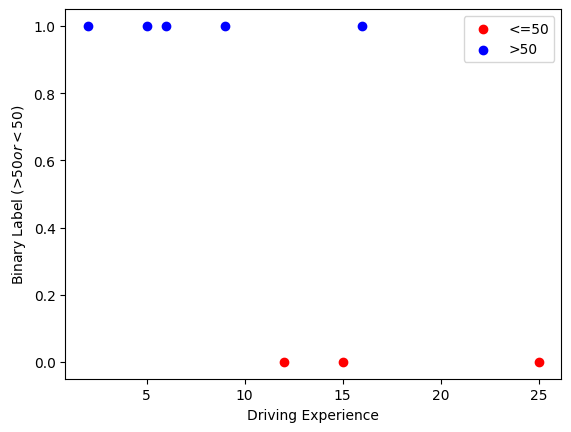

In [5]:
# Plotting the binary classes with different colors for each class (0 and 1)
plt.scatter(x[y_binary == 0], y_binary[y_binary == 0], color='red', label="<=50")  
plt.scatter(x[y_binary == 1], y_binary[y_binary == 1], color='blue', label=">50") 

# Adding labels and title
plt.xlabel("Driving Experience")
plt.ylabel("Binary Label (>50$ or <50$)")
#plt.title("Scatter Plot of Binary Labels")
plt.legend()

# Show the plot
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
#Reshape data
x = x.reshape(-1, 1)

#create model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(x, y_binary)

# Predict probabilities 
y_pred_prob = log_reg.predict_proba(x)[:, 1]

# Predict classes 
y_pred_class = log_reg.predict(x)

In [22]:
import pandas as pd
results = pd.DataFrame({'X':x.reshape(1,-1)[0],
                       'y': y_binary,
                       'Probability (>50$)':y_pred_prob,
                       'predicted class':y_pred_class })

In [23]:
results

,X,y,Probability (>50$),predicted class
0,5,1,0.942797,1
1,2,1,0.977799,1
2,12,0,0.624515,1
3,9,1,0.816330,1
4,15,0,0.383631,0
5,6,1,0.922342,1
6,25,0,0.022965,0
7,16,1,0.309640,0


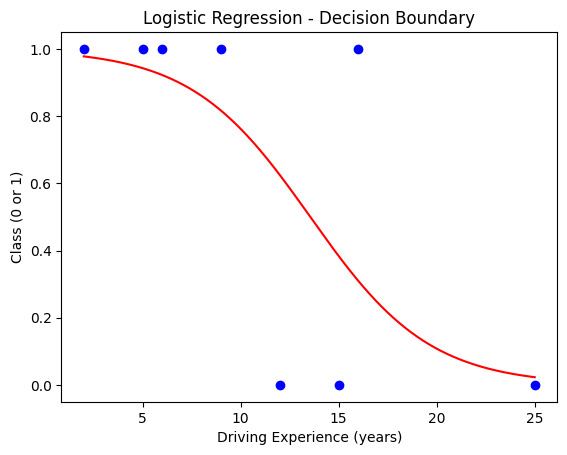

In [28]:
# Plotting the data and decision boundary
plt.scatter(x, y_binary, color='blue', label='Train Data')
#plt.scatter(x_test, y_test, color='green', label='Test Data')

# Decision boundary (when model prediction is 0.5)
x_boundary = np.linspace(min(x), max(x), 1000).reshape(-1, 1)
y_boundary = log_reg.predict_proba(x_boundary)[:, 1]

plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')

plt.xlabel("Driving Experience (years)")
plt.ylabel("Class (0 or 1)")
plt.title("Logistic Regression - Decision Boundary")
#plt.legend()
plt.show()

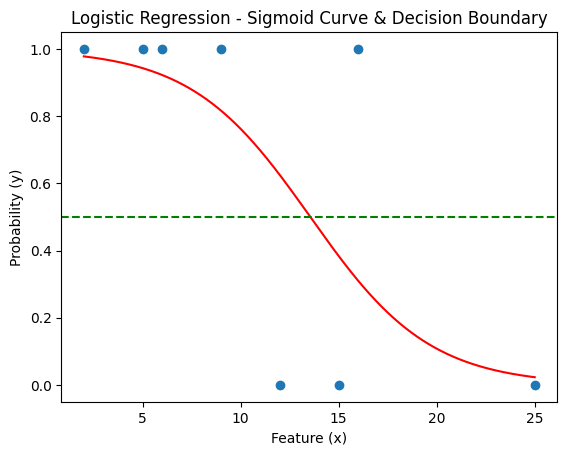

In [30]:
# Create a range of x values for plotting
x_boundary = np.linspace(min(x), max(x), 1000).reshape(-1, 1)

# Get the predicted probabilities
y_boundary = log_reg.predict_proba(x_boundary)[:, 1]

# Plot the scatter plot
plt.scatter(x, y_binary, label="Data Points")

# Plot the decision boundary (where the probability is 0.5)
plt.plot(x_boundary, y_boundary, color='red', label='Sigmoid Curve')

# Add the decision boundary at P=0.5 (for classification)
plt.axhline(y=0.5, color='green', linestyle='--', label='Decision Boundary (P=0.5)')

plt.xlabel('Feature (x)')
plt.ylabel('Probability (y)')
plt.title('Logistic Regression - Sigmoid Curve & Decision Boundary')
#plt.legend()
plt.show()

# Implementation of Logit Regression using scikit-learn

In [31]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
marks = pd.read_csv('marks.csv')

<Axes: xlabel='MID', ylabel='FINAL'>

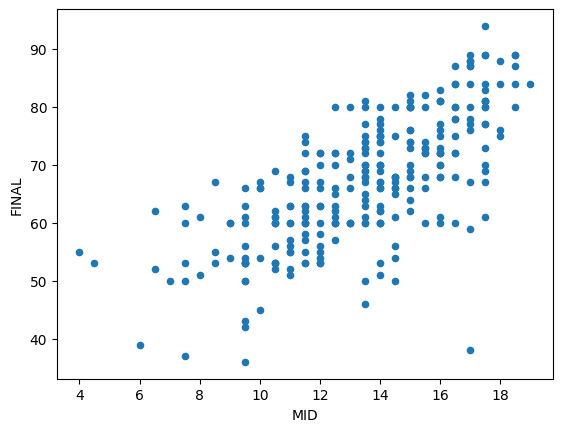

In [32]:
marks.plot.scatter('MID','FINAL')

In [42]:
#separating dependent and independent variables
x = marks.MID.fillna(marks.MID.mean())
y = marks.FINAL.fillna(marks.FINAL.mean())
#Data Preparation
X = x.values.reshape(-1,1)
#y= y.values.reshape(-1,1)

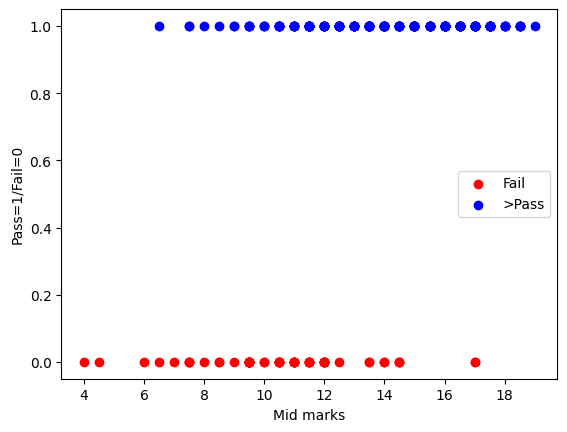

In [106]:
y_binary = np.where(y >= 60, 1, 0)
# Plotting the binary classes with different colors for each class (0 and 1)
plt.scatter(x[y_binary == 0], y_binary[y_binary == 0], color='red', label="Fail")  
plt.scatter(x[y_binary == 1], y_binary[y_binary == 1], color='blue', label=">Pass") 

# Adding labels and title
plt.xlabel("Mid marks")
plt.ylabel("Pass=1/Fail=0")
#plt.title("Scatter Plot of Binary Labels")
plt.legend()

# Show the plot
plt.show()

In [107]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.25, random_state = 42)

In [108]:
#create model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(x_train, y_train)

LogisticRegression()

In [109]:
# printing values
print('Slope:' ,log_reg.coef_)
print('Intercept:', log_reg.intercept_)

Slope: [[0.54731777]]
Intercept: [-5.20166376]


In [110]:
# Predict
y_train_predict = log_reg.predict(x_train)
y_test_predicted = log_reg.predict(x_test)

In [111]:
accuracy = np.mean(y_train_predict == y_train)  
print(f"Training Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.02%


In [114]:
accuracy = np.mean(y_test_predicted == y_test)  
print(f"Testing Accuracy: {accuracy * 100:.2f}%")

Testing Accuracy: 80.00%


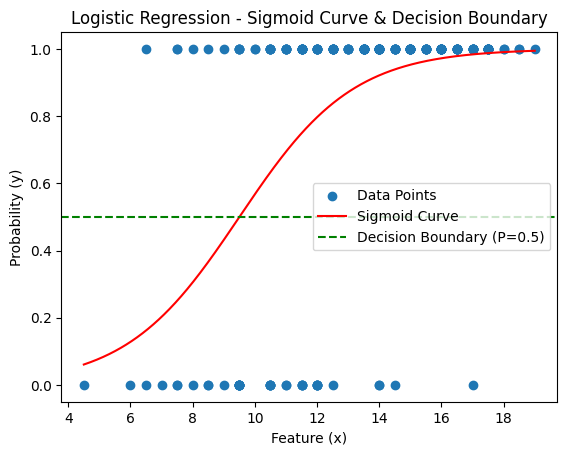

In [119]:
# Create a range of x values for plotting
x_boundary = np.linspace(min(x_train), max(x_train), 1000).reshape(-1, 1)

# Get the predicted probabilities
y_boundary = log_reg.predict_proba(x_boundary)[:, 1]

# Plot the scatter plot
plt.scatter(x_train, y_train, label="Data Points")

# Plot the decision boundary (where the probability is 0.5)
plt.plot(x_boundary, y_boundary, color='red', label='Sigmoid Curve')

# Add the decision boundary at P=0.5 (for classification)
plt.axhline(y=0.5, color='green', linestyle='--', label='Decision Boundary (P=0.5)')

plt.xlabel('Feature (x)')
plt.ylabel('Probability (y)')
plt.title('Logistic Regression - Sigmoid Curve & Decision Boundary')
plt.legend()
plt.show()